<a href="https://colab.research.google.com/github/sarahfirouzabadi/Summer-2025-ECE-597-Group5/blob/main/Only_SpamAssasin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from scipy.sparse import hstack, csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
TFIDV=TfidfVectorizer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
SpamAssasin = pd.read_csv('/SpamAssasin.csv')
SpamAssasin.head()

label_counts = SpamAssasin['label'].value_counts().sort_index()
num_ham = label_counts.get(0, 0)
num_spam = label_counts.get(1, 0)

print(f"SpamAssasin:\nHam: {num_ham}\nSpam: {num_spam}")

SpamAssasin:
Ham: 4091
Spam: 1718


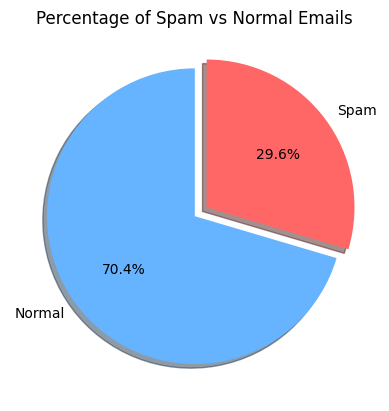

In [8]:
email_counts = SpamAssasin['label'].value_counts().rename({0: 'Normal', 1: 'Spam'})

email_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff6666'],
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)

plt.title('Percentage of Spam vs Normal Emails')
plt.ylabel('')

plt.show()


Cleaned SpamAssasin dataset shape: (5792, 7)


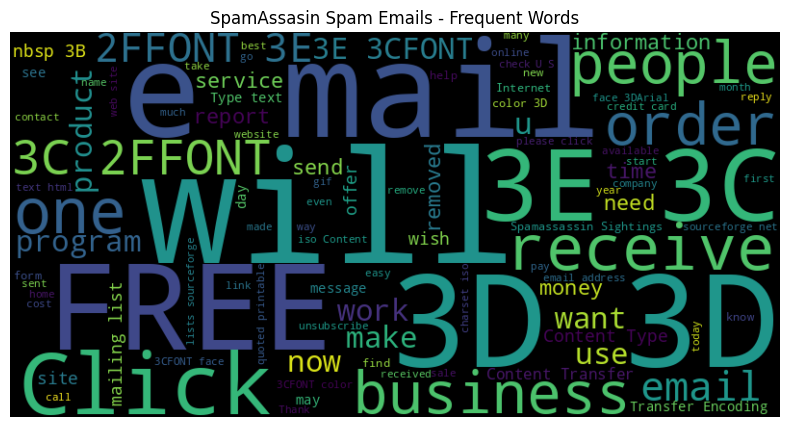


Top 50 frequent words in SpamAssasin spam emails:
com: 3806
http: 3680
email: 2743
free: 2499
www: 2372
e: 2049
click: 1789
mail: 1728
please: 1669
get: 1604
business: 1564
money: 1533
one: 1477
list: 1439
us: 1424
information: 1337
net: 1332
content: 1193
time: 1190
people: 1154
receive: 1149
new: 1105
address: 1098
name: 1038
send: 1026
order: 1024
make: 990
internet: 910
home: 876
message: 841
want: 834
report: 800
mailing: 770
site: 761
web: 746
like: 743
remove: 739
use: 739
type: 737
may: 725
company: 695
credit: 695
removed: 689
gif: 677
program: 663
also: 659
life: 657
lists: 656
government: 647
would: 645

Top 50 frequent words in SpamAssasin normal emails:
http: 18754
com: 17025
www: 10861
gif: 7016
b: 5977
cnet: 5448
net: 4417
list: 3956
linux: 3906
one: 2736
users: 2559
zdnet: 2470
home: 2454
listinfo: 2421
get: 2387
lists: 2361
ie: 2331
use: 2257
new: 2227
would: 2082
like: 2026
org: 1939
mailman: 1928
time: 1883
html: 1862
wrote: 1707
mail: 1636
razor: 1602
people: 1598


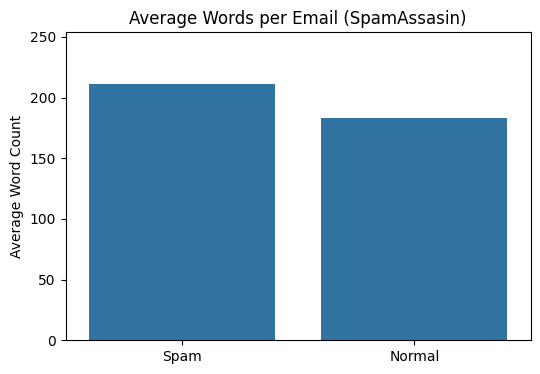

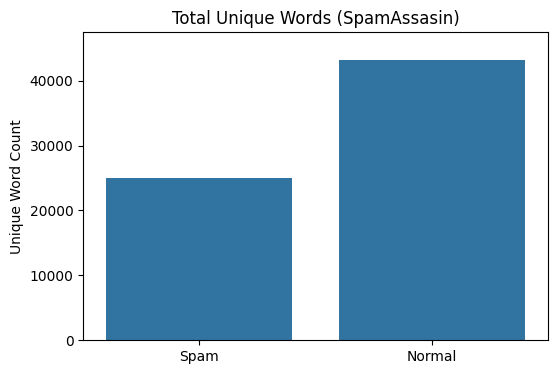

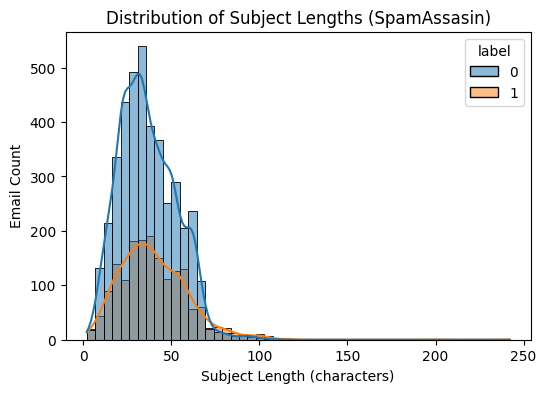


Average subject length - SpamAssasin Spam: 40.04
Average subject length - SpamAssasin Normal: 36.60


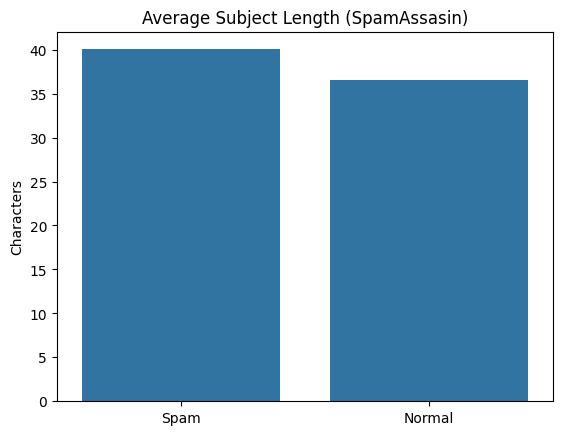

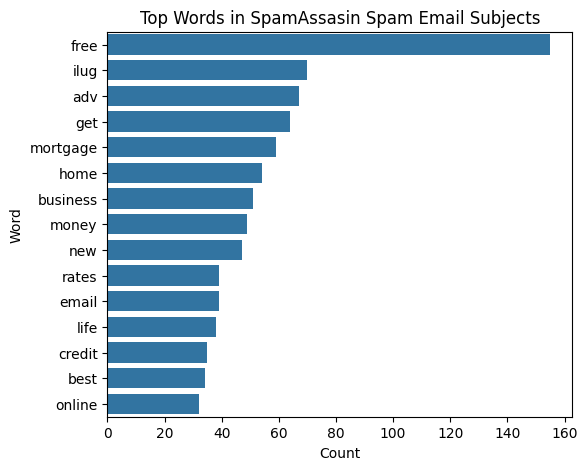

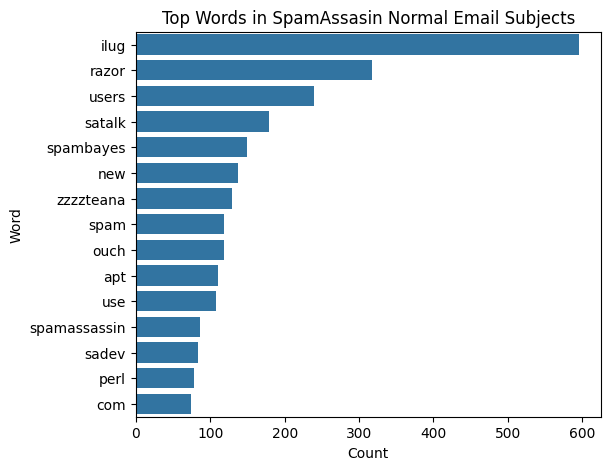


Sender Domain Value Counts (SpamAssasin):
sender_domain
spamassassin.taint.org>    595
hotmail.com>               185
yahoo.com>                 110
newsletter.online.com>      85
slack.net>                  81
Name: count, dtype: int64

Sample cleaned body (SpamAssasin): ['date', 'wed', 'aug', 'chris', 'garrigues', 'messageid', 'tmdadeepeddyvirciocom', 'cant', 'reproduce', 'error', 'repeatable', 'like', 'every', 'time', 'without', 'fail', 'debug', 'log', 'pick', 'happening', 'pickit', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'sequence', 'mercury', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'sequence', 'mercury', 'ftocpickmsgs', 'hit', 'marking', 'hits', 'tkerror', 'syntax', 'error', 'expression', 'int', 'note', 'run', 'pick', 'command', 'hand', 'delta', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'sequence', 'mercury', 'hit', 'thats', 'hit', 'comes'

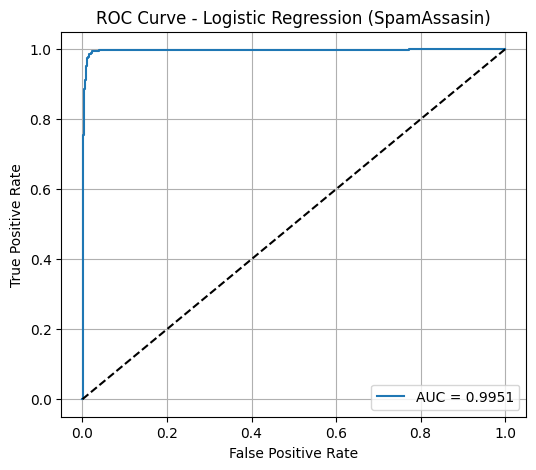

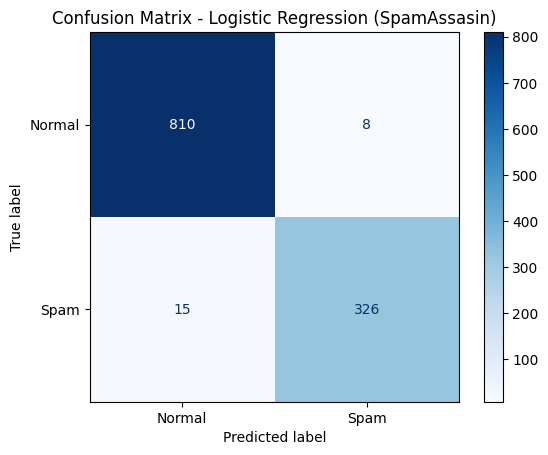


Random Forest (SpamAssasin):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       818
           1       0.98      0.95      0.96       341

    accuracy                           0.98      1159
   macro avg       0.98      0.97      0.97      1159
weighted avg       0.98      0.98      0.98      1159

ROC AUC Score: 0.9953036158572874


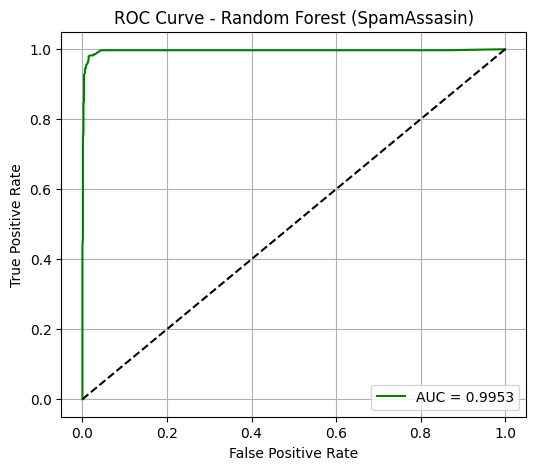

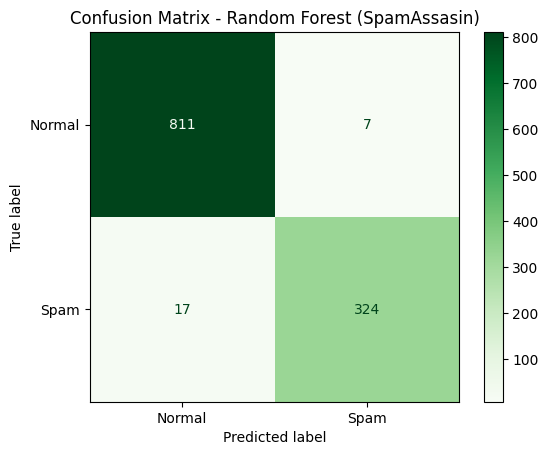


Model Comparison (SpamAssasin):
                 Model  Accuracy   ROC_AUC
0  Logistic Regression  0.980155  0.995053
1        Random Forest  0.979292  0.995304

Naive Bayes (SpamAssasin):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       818
           1       0.94      0.94      0.94       341

    accuracy                           0.96      1159
   macro avg       0.96      0.96      0.96      1159
weighted avg       0.96      0.96      0.96      1159

ROC AUC Score: 0.957227054040683


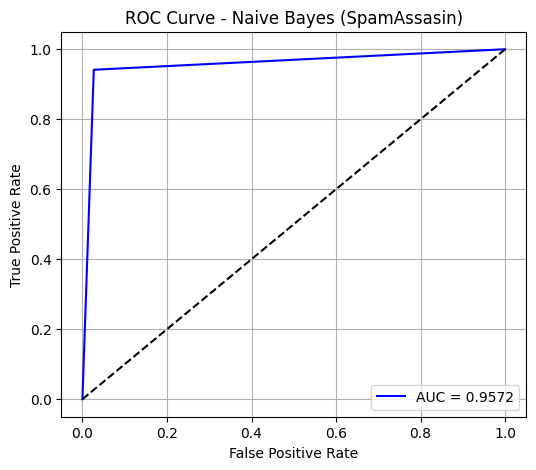

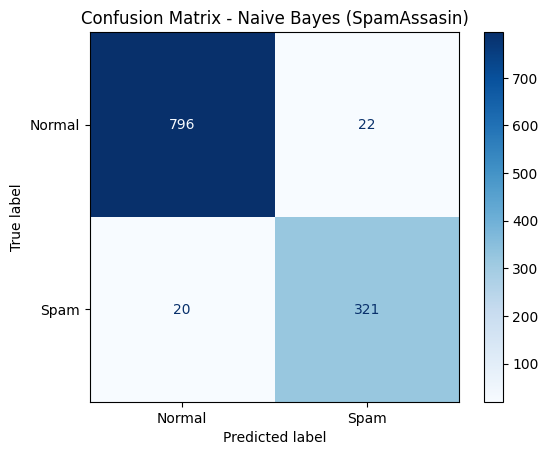

In [9]:
df = SpamAssasin.copy()
df.drop_duplicates(subset=['sender', 'subject', 'body'], inplace=True)
df.dropna(subset=['sender', 'subject', 'body'], inplace=True)

df.reset_index(drop=True, inplace=True)
print(f'\nCleaned SpamAssasin dataset shape: {df.shape}')

# Word cloud for spam emails in SpamAssasin
spam_emails_spamassasin = df[df['label'] == 1]['body'].dropna()

if not spam_emails_spamassasin.empty:
    spam_words = ' '.join(spam_emails_spamassasin)
    wordcloud_spam = WordCloud(width=800, height=400, max_words=100).generate(spam_words)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.title('SpamAssasin Spam Emails - Frequent Words')
    plt.axis('off')
    plt.show()
else:
    print("No spam emails to generate word cloud for in SpamAssasin dataset.")

stop_words = set(stopwords.words('english'))

word_counter_spam = Counter()
word_counter_normal = Counter()


for index, row in df.iterrows():
    text = row['body']
    label = row['label']
    if pd.isna(text):
      continue # Skip if body is NaN

    words = re.findall(r'\b[a-z]+\b', str(text).lower())
    filtered_words = [word for word in words if word not in stop_words]

    if label == 1:
        word_counter_spam.update(filtered_words)
    else:
        word_counter_normal.update(filtered_words)

print("\nTop 50 frequent words in SpamAssasin spam emails:")
for word, freq in word_counter_spam.most_common(50):
    print(f"{word}: {freq}")

print("\nTop 50 frequent words in SpamAssasin normal emails:")
for word, freq in word_counter_normal.most_common(50):
    print(f"{word}: {freq}")

# Tokenization and word statistics
def tokenize(text):
    text = str(text).lower()
    words = re.findall(r'\b[a-z]+\b', text)
    return [w for w in words if w not in stop_words]

df['tokens'] = df['body'].apply(tokenize)

spam_tokens = df[df['label'] == 1]['tokens']
normal_tokens = df[df['label'] == 0]['tokens']

if not spam_tokens.empty:
    avg_words_spam = spam_tokens.apply(len).mean()
    flat_spam = [word for tokens in spam_tokens for word in tokens]
    unique_spam = len(set(flat_spam))
    print(f"\nAverage words per SpamAssasin spam email: {avg_words_spam:.2f}")
    print(f"Total unique words in SpamAssasin spam emails: {unique_spam}")
else:
    print("\nNo spam emails in SpamAssasin to calculate average words or unique words.")

if not normal_tokens.empty:
    avg_words_normal = normal_tokens.apply(len).mean()
    flat_normal = [word for tokens in normal_tokens for word in tokens]
    unique_normal = len(set(flat_normal))
    print(f"Average words per SpamAssasin normal email: {avg_words_normal:.2f}")
    print(f"Total unique words in SpamAssasin normal emails: {unique_normal}")
else:
    print("No normal emails in SpamAssasin to calculate average words or unique words.")


# Most indicative spam words
if not spam_tokens.empty and not normal_tokens.empty:
    spam_counter = Counter(flat_spam)
    normal_counter = Counter(flat_normal)

    # Words more frequent in spam than normal (considering a minimum frequency)
    indicative_spam = {
        word: freq for word, freq in spam_counter.items()
        if freq > normal_counter.get(word, 0) # and freq > 5 # Optional: add threshold
    }

    top_indicative = Counter(indicative_spam).most_common(20)

    print("\nTop 20 words most indicative of SpamAssasin spam:")
    if top_indicative:
        for word, freq in top_indicative:
            print(f"{word}: {freq}")
    else:
        print("No words found that are more indicative of spam than normal.")
else:
    print("\nCannot determine indicative words without both spam and normal emails.")


# Plot average words
if 'avg_words_spam' in locals() and 'avg_words_normal' in locals():
    avg_words_data = {'Spam': avg_words_spam, 'Normal': avg_words_normal}

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(avg_words_data.keys()), y=list(avg_words_data.values()))
    plt.title('Average Words per Email (SpamAssasin)')
    plt.ylabel('Average Word Count')
    plt.ylim(0, max(avg_words_data.values()) * 1.2)
    plt.show()

# Plot unique words
if 'unique_spam' in locals() and 'unique_normal' in locals():
    unique_words_data = {'Spam': unique_spam, 'Normal': unique_normal}

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(unique_words_data.keys()), y=list(unique_words_data.values()))
    plt.title('Total Unique Words (SpamAssasin)')
    plt.ylabel('Unique Word Count')
    plt.ylim(0, max(unique_words_data.values()) * 1.1)
    plt.show()
# Subject analysis
df['subject_length'] = df['subject'].fillna('').apply(len)

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='subject_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Subject Lengths (SpamAssasin)')
plt.xlabel('Subject Length (characters)')
plt.ylabel('Email Count')
plt.show()


avg_len_spam_subject = df[df['label'] == 1]['subject_length'].mean()
avg_len_normal_subject = df[df['label'] == 0]['subject_length'].mean()

print(f"\nAverage subject length - SpamAssasin Spam: {avg_len_spam_subject:.2f}")
print(f"Average subject length - SpamAssasin Normal: {avg_len_normal_subject:.2f}")

sns.barplot(x=['Spam', 'Normal'], y=[avg_len_spam_subject, avg_len_normal_subject])
plt.title('Average Subject Length (SpamAssasin)')
plt.ylabel('Characters')
plt.show()

# Top words in subjects
stop_words = set(stopwords.words('english'))

def clean_subject(text):
    words = re.findall(r'\b[a-z]+\b', str(text).lower())
    return [w for w in words if w not in stop_words]

spam_subject_words = df[df['label'] == 1]['subject'].dropna().apply(clean_subject)
normal_subject_words = df[df['label'] == 0]['subject'].dropna().apply(clean_subject)

spam_subject_flat = [word for words in spam_subject_words for word in words]
normal_subject_flat = [word for words in normal_subject_words for word in words]

spam_top_subject = Counter(spam_subject_flat).most_common(15)
normal_top_subject = Counter(normal_subject_flat).most_common(15)

if spam_top_subject:
    df_spam_subject = pd.DataFrame(spam_top_subject, columns=['Word', 'Count'])
    plt.figure(figsize=(6, 5))
    sns.barplot(data=df_spam_subject, y='Word', x='Count')
    plt.title('Top Words in SpamAssasin Spam Email Subjects')
    plt.show()
else:
    print("No common words found in SpamAssasin spam subjects.")

if normal_top_subject:
    df_normal_subject = pd.DataFrame(normal_top_subject, columns=['Word', 'Count'])
    plt.figure(figsize=(6, 5))
    sns.barplot(data=df_normal_subject, y='Word', x='Count')
    plt.title('Top Words in SpamAssasin Normal Email Subjects')
    plt.show()
else:
    print("No common words found in SpamAssasin normal subjects.")
# Extracting the Domain
df["sender_domain"]=df['sender'].fillna('').str.split('@').str[1]
print("\nSender Domain Value Counts (SpamAssasin):")
print(df["sender_domain"].value_counts().head())
# Data cleaning and tokenization for modeling
def clean_and_tokenize(text):
    text = str(text).lower()                             # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)                 # Remove punctuation and numbers
    tokens = text.split()                                # Tokenize by whitespace
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    return tokens

df['body_tokens'] = df['body'].fillna('').apply(clean_and_tokenize)
df['subject_tokens'] = df['subject'].fillna('').apply(clean_and_tokenize)

print("\nSample cleaned body (SpamAssasin):", df['body_tokens'].iloc[0])
print("Sample cleaned subject (SpamAssasin):", df['subject_tokens'].iloc[0])

# Feature engineering
df['email_length'] = df['body'].fillna('').str.len()
df['subject_length'] = df['subject'].fillna('').str.len()
df['body_word_count'] = df['body_tokens'].apply(len)
df['subject_word_count'] = df['subject_tokens'].apply(len)

url_pattern = r'(https?://[^\s]+)'
df['num_urls'] = df['body'].fillna('').apply(lambda x: len(re.findall(url_pattern, x)))

df['sender_domain_clean'] = df['sender_domain'].fillna('')


print("\nPreview engineered features (SpamAssasin):")
print(df[['email_length', 'subject_length', 'body_word_count', 'subject_word_count',
          'num_urls', 'sender_domain']].head())

# TF-IDF
df['body_clean'] = df['body_tokens'].apply(lambda x: ' '.join(x))
df['subject_clean'] = df['subject_tokens'].apply(lambda x: ' '.join(x))


# Re-initialize TF-IDF vectorizers if needed, or ensure they are fit on SpamAssasin data
tfidf_body = TfidfVectorizer(stop_words='english', max_features=3000)
X_body = tfidf_body.fit_transform(df['body_clean'])

tfidf_subject = TfidfVectorizer(stop_words='english', max_features=1000)
X_subject = tfidf_subject.fit_transform(df['subject_clean'])

tfidf_sender = TfidfVectorizer()
X_sender = tfidf_sender.fit_transform(df['sender_domain_clean'])


print("\nTF-IDF shape (body, SpamAssasin):", X_body.shape)
print("TF-IDF shape (subject, SpamAssasin):", X_subject.shape)
print("TF-IDF shape (sender, SpamAssasin):", X_sender.shape)
# Prepare data for modeling
y = df['label']

numeric_cols = [
    'email_length',
    'subject_length',
    'body_word_count',
    'subject_word_count',
    'num_urls'
]
X_numeric_raw = df[numeric_cols].fillna(0)

scaler = StandardScaler()
X_numeric = scaler.fit_transform(X_numeric_raw)


X_all = hstack([
    X_body,
    X_subject,
    X_sender,
    csr_matrix(X_numeric)
])


X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y # stratify is good practice with imbalanced data, even without downsampling
)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train label distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test label distribution:\n{y_test.value_counts(normalize=True)}")
# Logistic Regression:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluating
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression (SpamAssasin):")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log))

# ROC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = roc_auc_score(y_test, y_proba_log)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f'AUC = {auc_log:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (SpamAssasin)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)

disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Normal", "Spam"])
disp_log.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression (SpamAssasin)")
plt.grid(False)
plt.show()
# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest (SpamAssasin):")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.4f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (SpamAssasin)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Normal", "Spam"])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Random Forest (SpamAssasin)")
plt.grid(False)
plt.show()
# Comparison table
comparison_data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    "ROC_AUC": [roc_auc_score(y_test, y_proba_log), roc_auc_score(y_test, y_proba_rf)],
}
print("\nModel Comparison (SpamAssasin):")
print(pd.DataFrame(comparison_data))
# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense

y_pred_nb = nb_model.predict(X_test.toarray())
y_proba_nb = nb_model.predict_proba(X_test.toarray())[:, 1]

print("\nNaive Bayes (SpamAssasin):")
print(classification_report(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_nb))

# ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
auc_nb = roc_auc_score(y_test, y_proba_nb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_nb, tpr_nb, label=f'AUC = {auc_nb:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (SpamAssasin)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Normal", "Spam"])
disp_nb.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Naive Bayes (SpamAssasin)")
plt.grid(False)
plt.show()